In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

LW=load_wine()
df_wine=pd.DataFrame(data=LW.data,columns=LW.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#Relación lineal entre `alcohol` y `alcalinity_of_ash`

In [ ]:
# minimize?

In [7]:
# Definición del criterio de optimización
#
def minimosCuadrados(w,x,y):
  f=w[0]+w[1]*x          # función lineal
  return np.mean((f-y)**2) # promedio de los errores, entre la función y los datos, al cuadrado

In [8]:
w0=np.random.rand(2) # Condición inicial. 2 elementos aleatorios
opt_alcohol=minimize(minimosCuadrados,w0,args=(df_wine['alcohol'],df_wine['alcalinity_of_ash']))
opt_alcohol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 10.022661300879175
        x: [ 3.609e+01 -1.276e+00]
      nit: 9
      jac: [ 1.192e-07  5.960e-07]
 hess_inv: [[ 1.296e+02 -9.929e+00]
            [-9.929e+00  7.638e-01]]
     nfev: 36
     njev: 12

Encontramos una relación entre `alcohol` y `alcalinity of ash` de la forma
$$
f=36.1-1.274alcohol,
$$
con un error cuadrático medio de 10.02

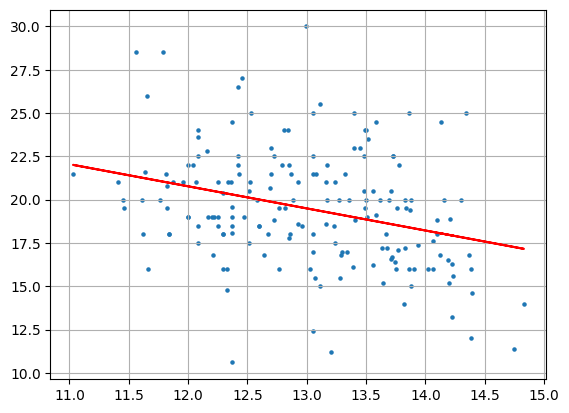

In [9]:
plt.scatter(df_wine['alcohol'],df_wine['alcalinity_of_ash'],s=5) #Datos
f=opt_alcohol.x[0]+opt_alcohol.x[1]*df_wine['alcohol']
plt.plot(df_wine['alcohol'],f,'r')
plt.grid()

#Relación lineal entre `ash` y `alcalinity_of_ash`

In [10]:
w0=np.random.rand(2) # Condición inicial. 2 elementos aleatorios
opt_alcohol=minimize(minimosCuadrados,w0,args=(df_wine['ash'],df_wine['alcalinity_of_ash']))
opt_alcohol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.910013811915242
        x: [ 6.723e+00  5.397e+00]
      nit: 7
      jac: [ 1.192e-07  0.000e+00]
 hess_inv: [[ 3.791e+01 -1.581e+01]
            [-1.581e+01  6.681e+00]]
     nfev: 27
     njev: 9

Encontramos una relación entre `ash` y `alcalinity of ash` de la forma
$$
f=67.2-5.394alcohol,
$$
con un error cuadrático medio de 8.91

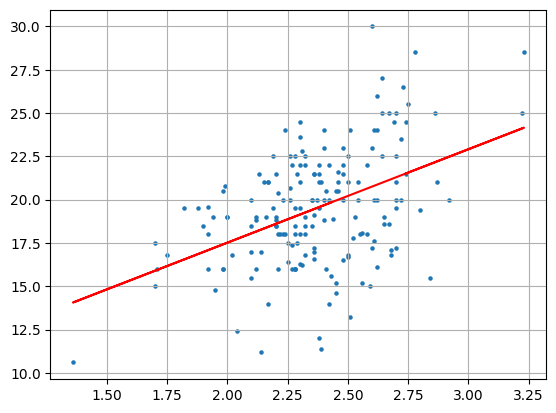

In [11]:
plt.scatter(df_wine['ash'],df_wine['alcalinity_of_ash'],s=5) #Datos
f=opt_alcohol.x[0]+opt_alcohol.x[1]*df_wine['ash']
plt.plot(df_wine['ash'],f,'r')
plt.grid()

## Usando la clase de SKLearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_wine['alcohol'].shape

(178,)

In [ ]:
df_wine[['alcohol']].shape

(178, 1)

In [ ]:
regressor_alcohol=LinearRegression()
regressor_alcohol.fit(df_wine[['alcohol']],df_wine['alcalinity_of_ash'])

LinearRegression()

In [ ]:
regressor_alcohol.coef_

array([-1.2761963])

In [ ]:
regressor_alcohol.intercept_

36.08628435556851

In [ ]:
#R^2
#Sí R^2 >= 0.8 descartamos una variable.

regressor_alcohol.score(df_wine[['alcohol']],df_wine['alcalinity_of_ash'])

0.09624584016183024

In [ ]:
# Relación entre las variables `ash` y `alcohol` con `alcalinity_of_ash`
regressor=LinearRegression()
regressor.fit(df_wine[['ash','alcohol']],df_wine['alcalinity_of_ash'])
regressor.score(df_wine[['ash','alcohol']],df_wine['alcalinity_of_ash'])

0.36745963729790754

In [5]:
w0=np.random.rand(3)

def minCuad(w,x1,x2,y):
  f=w[0]+w[1]*x1+w[2]*x2

In [12]:
opt_ash=minimize(minimosCuadrados,w0,args=(df_wine['ash'],df_wine['alcalinity_of_ash']))
opt_ash

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 8.910013811915242
        x: [ 6.723e+00  5.397e+00]
      nit: 7
      jac: [ 1.192e-07  0.000e+00]
 hess_inv: [[ 3.791e+01 -1.581e+01]
            [-1.581e+01  6.681e+00]]
     nfev: 27
     njev: 9

Encontramos una relación entre `ash` y `alcalinity of ash` de la forma
$$
f=67.2-5.394alcohol,
$$
con un error cuadrático medio de 8.91